In [1]:
from glob import glob
import os
import nibabel as nib
import transform_HU_functions as hu
import augmentation as aug
import numpy as np
#from scipy.ndimage.interpolation import map_coordinates
#from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
import random_transformations as transf

In [2]:
path_image = 'C:\\Users\\cristina.de.la.torre\\Documents\\codigo\\cdelatorre_2\\resized_tr\\pancreas_001.nii.gz'
path_label = 'C:\\Users\\cristina.de.la.torre\\Documents\\codigo\\cdelatorre_2\\target_tr\\pancreas_001.nii.gz'

In [5]:
label = nib.load(path_label)
label_array = label.get_fdata()

image = nib.load(path_image)
image_array = image.get_fdata()
image_array = hu.window_image_min(image_array, -135, 250) #search best ..,img_min, img_max)
image_array = hu.normalise_zero_one(image_array)

In [27]:
from augmentation import flip, elastic_transform, add_gaussian_noise, add_gaussian_offset
import random
import numpy as np

def random_transformations(image_array, label_array, prob_flip = 0.4, prob_elastic = 0.4, prob_noise = 0.6, prob_offset = 0.6):
    # With a probility of 0.5 flip the image(s) across `axis` 0 or 1.
    do_flip = random.random()
    if do_flip > prob_flip:
        n = random.randint(0,1) # Puede tener valores entre 0 y 1, el 2 no lo queremos.horizontal or vertical flip
        # he eliminado el axis  = 2 porque en muchos sitios decia que no tenia mucho sentido
        image_array, label_array = flip(image_array, label_array, axis = n)
    
    do_elastic = random.random()
    if do_elastic > prob_elastic:    
        do_high_or_low = 1 #random.randint(0,1) # entre 1 y 2, low or high
        # hacer research para ver que valores de alpha y signa poner
        print(do_high_or_low, 'High or low')
        if do_high_or_low == 0:
            image_array, label_array = elastic_transform(image_array,label_array, alpha=[10, 100, 1000], sigma=[1, 10, 15]) #Low deformation
        elif do_high_or_low == 1:
            image_array, label_array = elastic_transform(image_array,label_array, alpha=[10, 200, 2000], sigma=[1, 25, 25]) #High deformation
        
    do_noise = random.random()
    if do_noise > prob_noise:
        sigma = random.random() #0.05, hacer research y probar para ver que rango de sigma poner
        image_array = add_gaussian_noise(image_array, sigma)
    
    do_offset = np.random.random()
    if do_offset > prob_offset:
        sigma = random.random() # 0,1, hacer research y probar para ver que rango de sigma poner
        image_array  = add_gaussian_offset(image_array, sigma)

    return image_array, label_array

In [28]:
image_array_tr, label_array_tr = random_transformations(image_array, label_array,  prob_flip = 1, prob_elastic = 0, prob_noise = 1, prob_offset = 1)


1 High or low


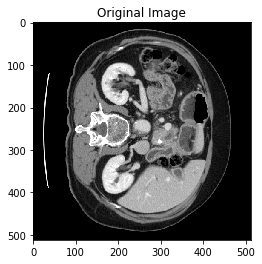

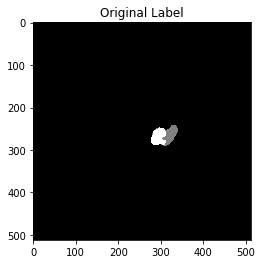

In [29]:
#Result visualization example:
Image_array_slice = image_array[:,:,40]
plt.imshow(Image_array_slice, cmap='gray')
plt.title('Original Image')
plt.show()

label_array_slice = label_array[:,:,40]
plt.imshow(label_array_slice, cmap='gray')
plt.title('Original Label')
plt.show()

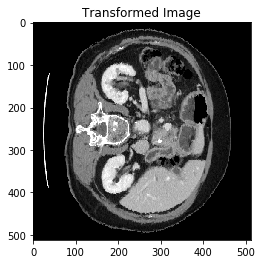

(512, 512)


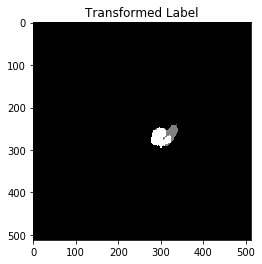

In [30]:
#Result visualization example:
image_array_tr_slice = image_array_tr[:,:,40]
plt.imshow(image_array_tr_slice, cmap='gray')
plt.title('Transformed Image')
plt.show()

print(image_array_tr_slice.shape)
label_array_tr_slice = label_array_tr[:,:,40]
plt.imshow(label_array_tr_slice, cmap='gray')
plt.title('Transformed Label')
plt.show()

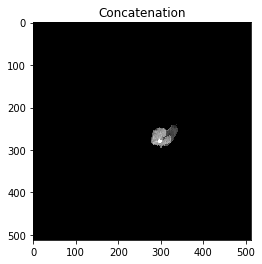

In [31]:
conc = image_array_tr_slice * label_array_tr_slice
plt.imshow(conc, cmap='gray')
plt.title('Concatenation')
plt.show()